In [18]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from graphviz import Source
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#from autosklearn.classification import AutoSklearnClassifier
import pickle

In [19]:
from google.colab import files
uploaded = files.upload()

Saving ai4i2020.csv to ai4i2020 (1).csv


In [20]:
dataset=pd.read_csv('ai4i2020.csv')

In [21]:
dataset.drop("Product ID", axis=1, inplace=True)
dataset.drop("UDI", axis=1, inplace=True)
dataset.drop("TWF", axis=1, inplace=True)
dataset.drop("HDF", axis=1, inplace=True)
dataset.drop("PWF", axis=1, inplace=True)
dataset.drop("OSF", axis=1, inplace=True)
dataset.drop("RNF", axis=1, inplace=True)

In [22]:
pd.DataFrame.drop_duplicates(dataset, subset=dataset.columns.difference(['Machine failure']), inplace=True)

In [23]:
dataset

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [24]:
one_hot = pd.get_dummies(dataset['Type'])
dataset = dataset.drop('Type', axis=1)
last = dataset.iloc[:, -1]
dataset = dataset.drop('Machine failure', axis = 1)
dataset = dataset.join(one_hot)
dataset = dataset.join(last)

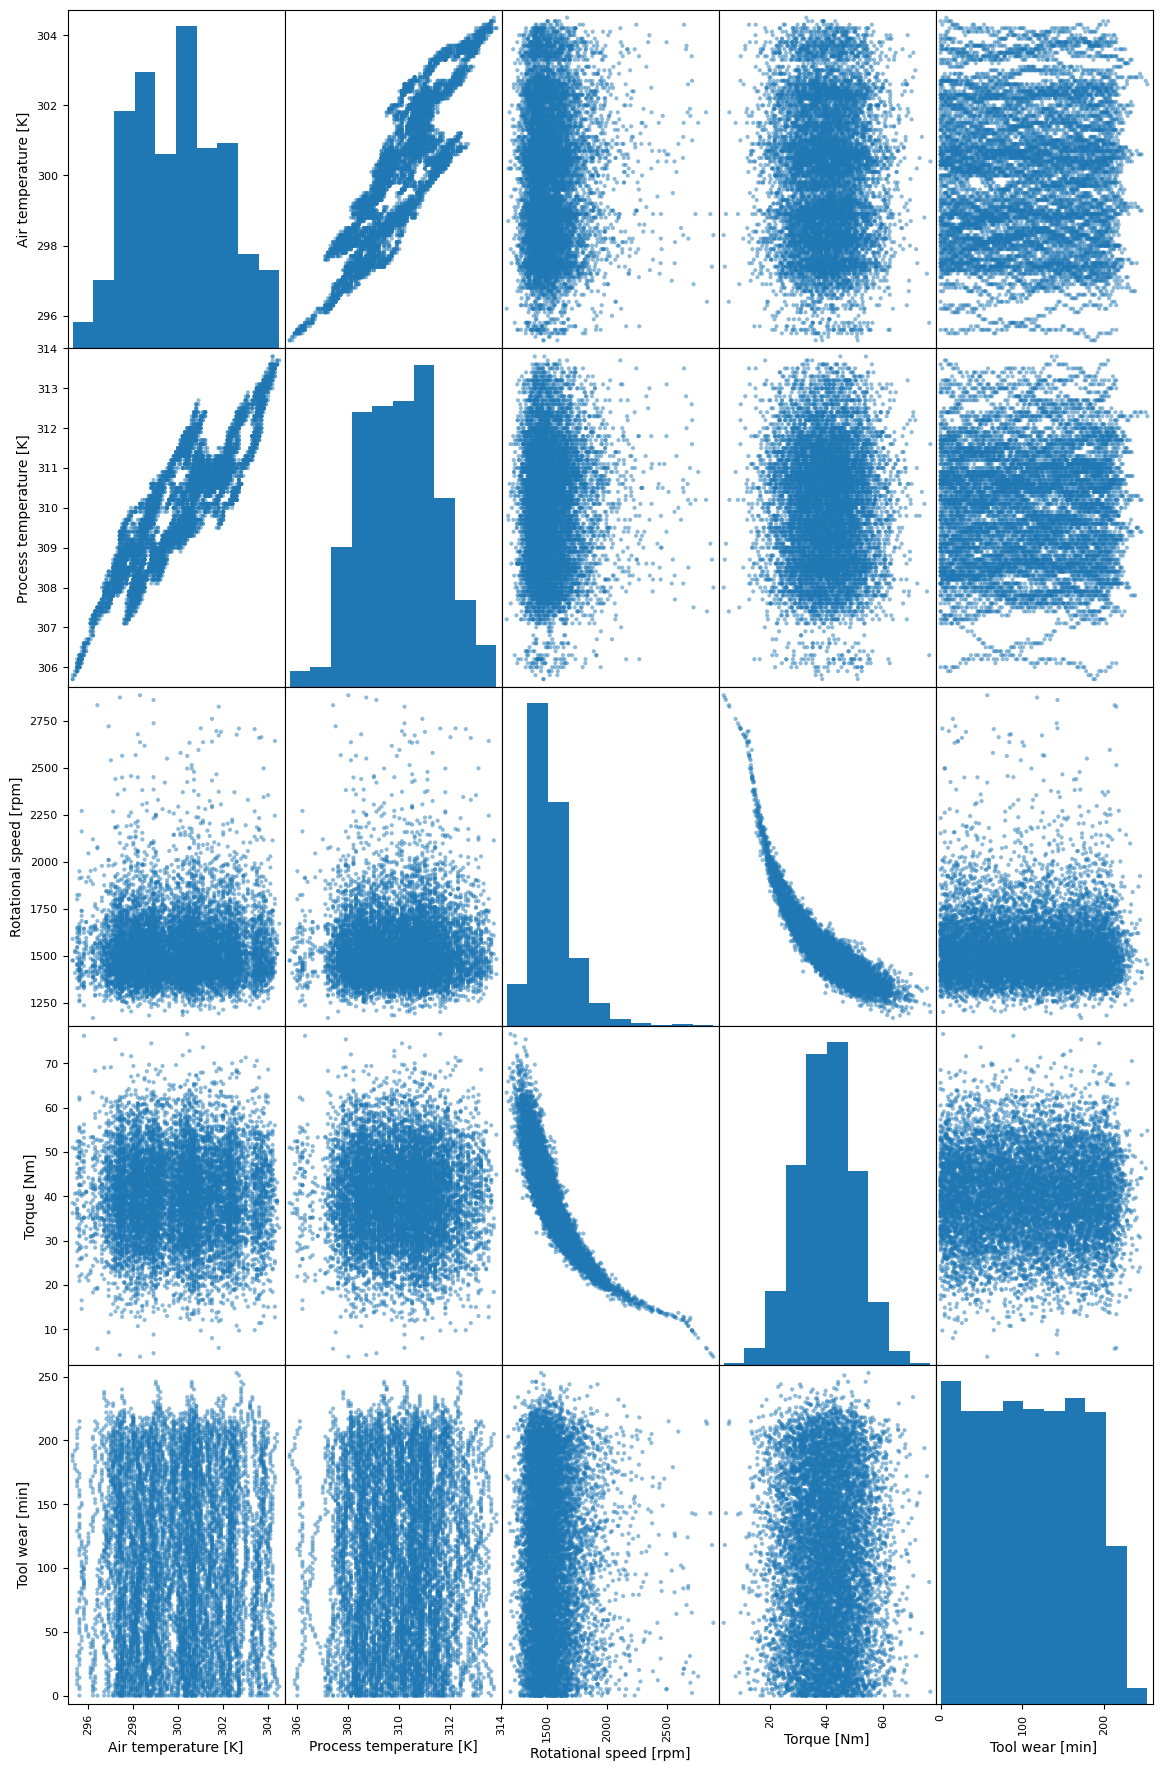

In [29]:
pd.plotting.scatter_matrix(dataset.drop(['L', 'M', 'H', 'Machine failure'], axis=1, inplace=False), figsize=(14,22))
plt.show()

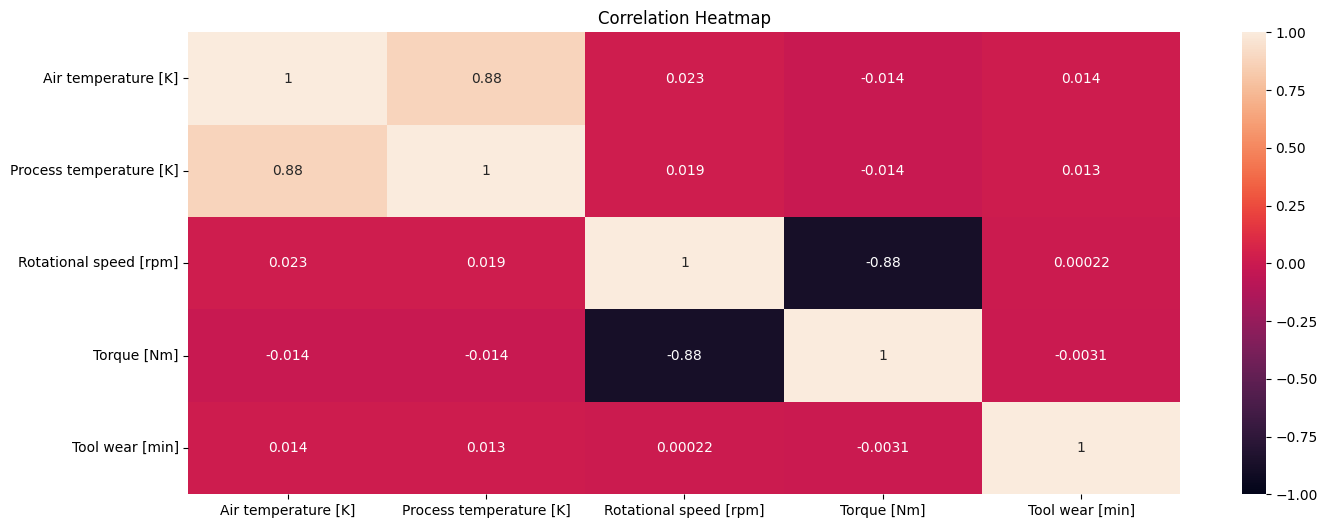

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.drop(['L', 'M', 'H', 'Machine failure'], axis=1, inplace=False).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

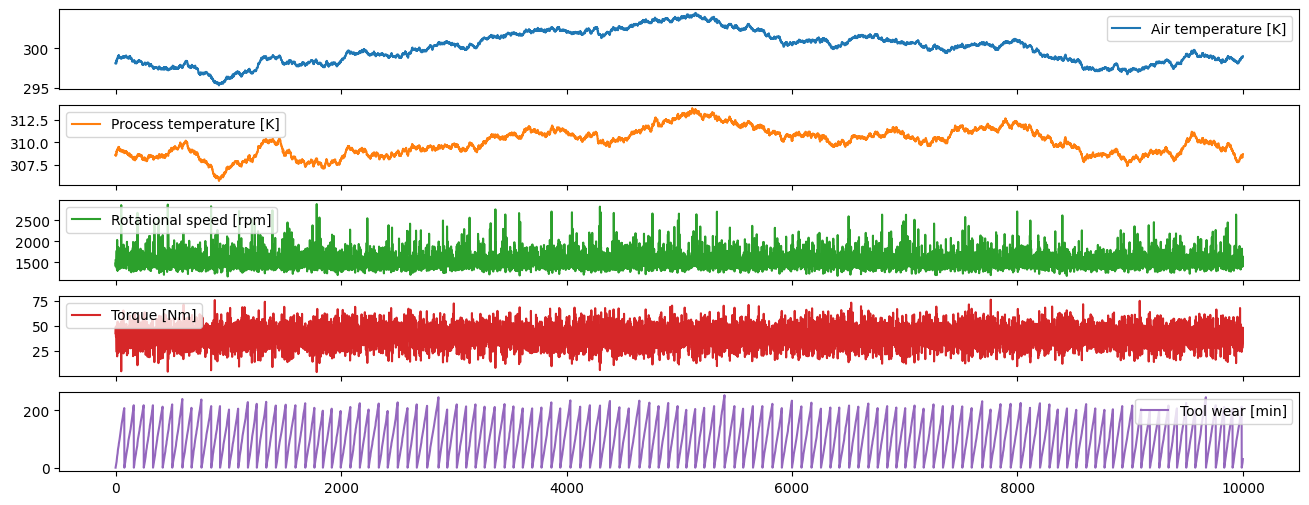

In [30]:
dataset.drop(['L', 'M', 'H', 'Machine failure'], axis=1, inplace=False).plot(subplots=True, figsize=(16,6))
plt.show()